<a href="https://colab.research.google.com/github/ProteintechLab/Statistics/blob/main/western_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [ ]:
%%R
download.file("https://raw.githubusercontent.com/ProteintechLab/Statistics/main/blot_quant.csv", "blot_quant")
#Fetch the file from Github

In [ ]:
%%R
library(tidyverse)

In [15]:
%%R
blot_quant<-read_csv("/content/blot_quant")
blot_quant
#Load the library and imort the file "blot_quant"

Rows: 16 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Area
dbl (3): Wavelength, Intensity, Group

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 16 × 4
   Wavelength Area  Intensity Group
        <dbl> <chr>     <dbl> <dbl>
 1        800 Lane1     17900     1
 2        800 Lane2     16500     1
 3        800 Lane3     17900     1
 4        800 Lane4     16500     1
 5        800 Lane5     10800     2
 6        800 Lane6      7060     2
 7        800 Lane7      8020     2
 8        800 Lane8      6590     2
 9        700 Lane1     38900     1
10        700 Lane2     33700     1
11        700 Lane3     29000     1
12        700 Lane4     24600     1
13        700 Lane5     32300     2
14        700 Lane6     27800     2
15        700 Lane7     30600     2
16        700 Lane8     34200     2


In [16]:
%%R
blot_quant<-blot_quant%>%pivot_wider(names_from = Wavelength , values_from = Intensity )

#The data is in the wide format, in this example we are reshaping the data to the long format, using pivot_wider

In [17]:
%%R
blot_quant

#Note the change of shape

# A tibble: 8 × 4
  Area  Group `800` `700`
  <chr> <dbl> <dbl> <dbl>
1 Lane1     1 17900 38900
2 Lane2     1 16500 33700
3 Lane3     1 17900 29000
4 Lane4     1 16500 24600
5 Lane5     2 10800 32300
6 Lane6     2  7060 27800
7 Lane7     2  8020 30600
8 Lane8     2  6590 34200


In [18]:
%%R
colnames(blot_quant)<-c("Area", "Group", "W800", "W700")

#Here we have renamed the columns, with the function colnames()

In [19]:
%%R
blot_quant<-blot_quant%>%mutate(norm_ratio=W800/W700)
blot_quant

#We are making a ratio of the two intensity readings, using mutate we have created a new column called norm_ratio

# A tibble: 8 × 5
  Area  Group  W800  W700 norm_ratio
  <chr> <dbl> <dbl> <dbl>      <dbl>
1 Lane1     1 17900 38900      0.460
2 Lane2     1 16500 33700      0.490
3 Lane3     1 17900 29000      0.617
4 Lane4     1 16500 24600      0.671
5 Lane5     2 10800 32300      0.334
6 Lane6     2  7060 27800      0.254
7 Lane7     2  8020 30600      0.262
8 Lane8     2  6590 34200      0.193


In [20]:
%%R
blotmean<-blot_quant%>%group_by(Group)%>%summarise(mean_ratio=mean(norm_ratio), sd_ratio=sd(norm_ratio))

#Summary statistics for the new norm_ratio column

In [21]:
%%R
blotmean

#Print of the new data frame of mean and sd values

# A tibble: 2 × 3
  Group mean_ratio sd_ratio
  <dbl>      <dbl>    <dbl>
1     1      0.559   0.101 
2     2      0.261   0.0580


In [22]:
%%R
t.test(norm_ratio~Group, data=blot_quant)

#Here we are performing a T-test


	Welch Two Sample t-test

data:  norm_ratio by Group
t = 5.1371, df = 4.7923, p-value = 0.004124
alternative hypothesis: true difference in means between group 1 and group 2 is not equal to 0
95 percent confidence interval:
 0.1472434 0.4500755
sample estimates:
mean in group 1 mean in group 2 
      0.5594354       0.2607759 



In [23]:
%%R
blotmean$Group<-factor(blotmean$Group, levels=c("1", "2"))

#Here Group as a numeric value to make this a category, we can turn it into a factor

In [24]:
%%R
library(forcats)

blotmean$Group <- factor(blotmean$Group, levels = c("1", "2")) # Optional: Sets the order

blotmean <- blotmean %>%
  mutate(Group = fct_recode(Group,
                           "Con" = "1",  # New_name = Old_name
                           "Treat" = "2")) # New_name = Old_name

#We can also use the forcats package to rename 1 and 2 to something more meaingful

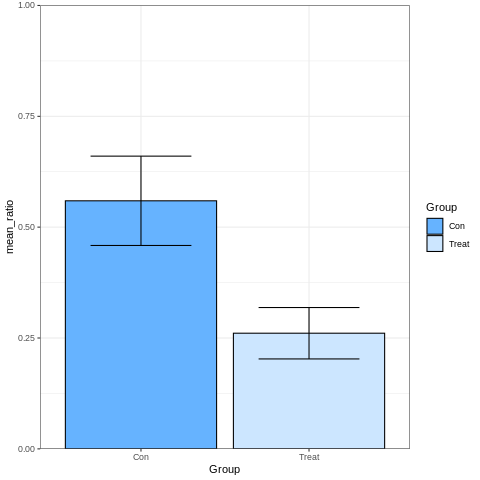

In [25]:
%%R
p<-blotmean%>%ggplot(aes(Group, mean_ratio, fill=Group))+geom_bar(stat="identity", position = position_dodge(),colour="black")+
geom_errorbar(aes(ymin = mean_ratio-sd_ratio, ymax = mean_ratio+sd_ratio),position=position_dodge(.9), width=0.6)+
scale_y_continuous(limits = c(0, 1), expand = c(0, 0))+
scale_fill_manual(values=c('#66b3ff','#cce6ff'))+theme_bw()
ylab("Ratio")
p